# Some intuition on Bayes

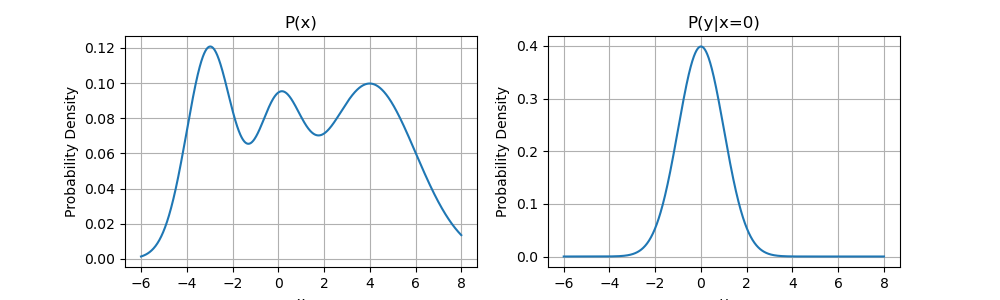

In [1]:
# Define the following 2 distributions:
# p(x) ~ 0.3N(-3, 1) + 0.2N(0, 1) + 0.5N(4, 2)
# p(y|x) ~ N(x, 1)
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the mixture model
weights = [0.3, 0.2, 0.5]
means = [-3, 0, 4]
stddevs = [1, 1, 2]

# Generate points for x-axis
x = np.linspace(-6, 8, 1000)

# Plot the mixture of Gaussian distributions
y = np.zeros_like(x)
for mean, stddev, weight in zip(means, stddevs, weights):
    y += weight * norm.pdf(x, mean, stddev)

# Plot another single gaussian side by side using subplot
y_single = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 3))
axes = plt.subplot(1, 2, 1)
axes.plot(x, y)
axes.set_title('P(x)')
axes.set_xlabel('x')
axes.set_ylabel('Probability Density')
axes.grid(True)

axes = plt.subplot(1, 2, 2)
axes.plot(x, y_single)
axes.set_title('P(y|x=0)')
axes.set_xlabel('y')
axes.set_ylabel('Probability Density')
axes.grid(True)


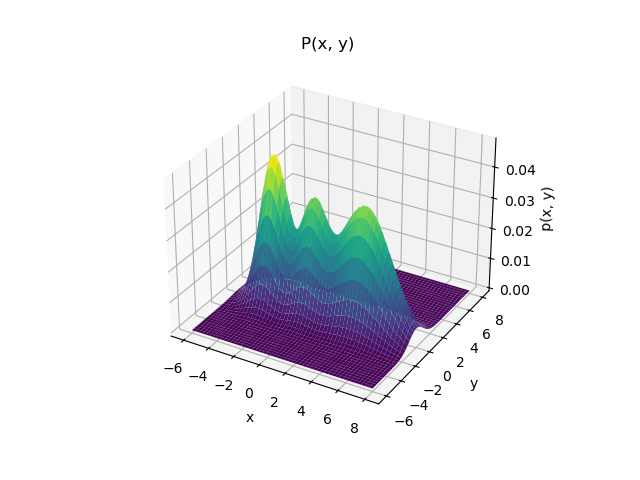

In [2]:
# Now let's plot the corresponding P(x, y)
# The joint distribution is given by p(x, y) = p(y|x) * p(x), so we need to expand to 3D to plot it
# Let's also make it rotatable using the 3D plot
from mpl_toolkits.mplot3d import axes3d    # Import the 3D plotting tool

X, Y = np.meshgrid(x, x)
Z = np.zeros_like(X)
for i in range(len(x)):
    Z[i, :] = y_single[i] * y

# use axes3d to plot it and make it interactive
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('p(x, y)')
ax.set_title('P(x, y)')
plt.show()


In [3]:
np.meshgrid([0, 1, 2],[0,1,2])

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]])]

In [8]:
x[x < 0]

array([-8.        , -7.98398398, -7.96796797, -7.95195195, -7.93593594,
       -7.91991992, -7.9039039 , -7.88788789, -7.87187187, -7.85585586,
       -7.83983984, -7.82382382, -7.80780781, -7.79179179, -7.77577578,
       -7.75975976, -7.74374374, -7.72772773, -7.71171171, -7.6956957 ,
       -7.67967968, -7.66366366, -7.64764765, -7.63163163, -7.61561562,
       -7.5995996 , -7.58358358, -7.56756757, -7.55155155, -7.53553554,
       -7.51951952, -7.5035035 , -7.48748749, -7.47147147, -7.45545546,
       -7.43943944, -7.42342342, -7.40740741, -7.39139139, -7.37537538,
       -7.35935936, -7.34334334, -7.32732733, -7.31131131, -7.2952953 ,
       -7.27927928, -7.26326326, -7.24724725, -7.23123123, -7.21521522,
       -7.1991992 , -7.18318318, -7.16716717, -7.15115115, -7.13513514,
       -7.11911912, -7.1031031 , -7.08708709, -7.07107107, -7.05505506,
       -7.03903904, -7.02302302, -7.00700701, -6.99099099, -6.97497497,
       -6.95895896, -6.94294294, -6.92692693, -6.91091091, -6.89

In [ ]:
ran